In [21]:
%run flood_helpers.ipynb
# .ipynb file with import packages and def functions to help clean up main notebook

# Load Data
### Source: 
FEMA's National Flood Insurance Policy Database [Kaggle](https://www.kaggle.com/datasets/lynma01/femas-national-flood-insurance-policy-database) <br/>
US Census Demographic Data [Kaggle](https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data)

In [22]:
flood_policies = load_data("nfip-flood-policies.csv")
flood_policies.shape

(50406944, 45)

In [23]:
flood_policies.head()

,agriculturestructureindicator,basefloodelevation,basementenclosurecrawlspacetype,cancellationdateoffloodpolicy,censustract,condominiumindicator,construction,countycode,crsdiscount,deductibleamountinbuildingcoverage,deductibleamountincontentscoverage,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,federalpolicyfee,floodzone,hfiaasurcharge,houseofworshipindicator,latitude,locationofcontents,longitude,lowestadjacentgrade,lowestfloorelevation,nonprofitindicator,numberoffloorsininsuredbuilding,obstructiontype,occupancytype,originalconstructiondate,originalnbdate,policycost,policycount,policyeffectivedate,policyterminationdate,policytermindicator,postfirmconstructionindicator,primaryresidenceindicator,propertystate,reportedzipcode,ratemethod,regularemergencyprogramindicator,reportedcity,smallbusinessindicatorbuilding,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,totalinsurancepremiumofthepolicy
0,NaN,NaN,2.0,NaN,3.301304e+10,N,N,33013.0,0.00,0,0,N,NaN,999.0,13.0,X,0.0,NaN,43.3,Basement/Enclosure/Crawlspace/Subgrade Crawlsp...,-71.8,NaN,NaN,NaN,2.0,NaN,1.0,1974-12-30,2008-08-19,388.0,1.0,2009-08-19,2010-08-19,1.0,N,Y,NH,03278,7,R,WARNER,NaN,250000.0,100000.0,375.0
1,NaN,NaN,0.0,NaN,2.206304e+10,N,N,22063.0,0.05,1,1,N,NaN,999.0,35.0,AE,0.0,NaN,30.5,Lowest floor only above ground level (No basem...,-91.0,NaN,NaN,NaN,1.0,NaN,3.0,1974-07-01,1997-10-04,315.0,1.0,2009-10-04,2010-10-04,1.0,N,Y,LA,70726,1,R,DENHAM SPRINGS,NaN,16400.0,8800.0,280.0
2,NaN,NaN,0.0,NaN,4.505106e+10,N,N,45051.0,0.00,0,0,N,1,999.0,13.0,X,0.0,NaN,33.7,Lowest floor only above ground level (No basem...,-79.0,NaN,NaN,NaN,1.0,NaN,1.0,2003-07-01,2005-08-13,348.0,1.0,2009-08-13,2010-08-13,1.0,Y,Y,SC,29579,7,R,MYRTLE BEACH,NaN,250000.0,100000.0,335.0
3,NaN,519.0,2.0,2016-04-01,1.055001e+09,N,N,1055.0,0.00,1,1,Y,NaN,-2.0,35.0,AE,0.0,NaN,34.0,NaN,-86.0,517.3,517.3,NaN,3.0,50,1.0,1989-01-01,2006-04-14,951.0,1.0,2009-04-14,2010-04-14,1.0,Y,Y,AL,35901,2,R,GADSDEN,NaN,174900.0,21000.0,916.0
4,NaN,7.0,0.0,NaN,1.208600e+10,N,N,12086.0,0.00,0,0,N,3,0.0,35.0,A10,0.0,NaN,26.0,Lowest floor only above ground level (No basem...,-80.1,NaN,6.9,NaN,1.0,NaN,1.0,1957-07-01,1996-04-04,1323.0,1.0,2009-04-04,2010-04-04,1.0,N,Y,FL,33160,1,R,GOLDEN BEACH,NaN,250000.0,100000.0,1288.0


In [24]:
policies_df = rename_flood_columns(flood_policies)
for col in policies_df.columns:
    print(col)

agriculture_structure_indicator
base_flood_elevation
basement_enclosure_crawlspace_type
cancellation_date_of_flood_policy
census_tract
condominium_indicator
construction
county_code
crs_discount
deductible_amount_in_building_coverage
deductible_amount_in_contents_coverage
elevated_building_indicator
elevation_certificate_indicator
elevation_difference
federal_policy_fee
flood_zone
hfiaa_surcharge
house_of_worship_indicator
latitude
location_of_contents
longitude
lowest_adjacent_grade
lowest_floor_elevation
non_profit_indicator
number_of_floors_in_insured_building
obstruction_type
occupancy_type
original_construction_date
original_nb_date
policy_cost
policy_count
policy_effective_date
policy_termination_date
policy_term_indicator
post_firm_construction_indicator
primary_residence_indicator
property_state
reported_zipcode
rate_method
regular_emergency_program_indicator
reported_city
small_business_indicator_building
total_building_insurance_coverage
total_contents_insurance_coverage
tota

In [25]:
census_df = load_data("acs2015_census_tract_data.csv")

In [26]:
census_df.shape

(74001, 37)

In [27]:
census_df = census_df.rename(columns=pascal_to_snake)
for col in census_df.columns:
    print(col)

census_tract
state
county
total_pop
men
women
hispanic
white
black
native
asian
pacific
citizen
income
income_err
income_per_cap
income_per_cap_err
poverty
child_poverty
professional
service
office
construction
production
drive
carpool
transit
walk
other_transp
work_at_home
mean_commute
employed
private_work
public_work
self_employed
family_work
unemployment


In [28]:
census_df.isna().sum()

census_tract             0
state                    0
county                   0
total_pop                0
men                      0
women                    0
hispanic               690
white                  690
black                  690
native                 690
asian                  690
pacific                690
citizen                  0
income                1100
income_err            1100
income_per_cap         740
income_per_cap_err     740
poverty                835
child_poverty         1118
professional           807
service                807
office                 807
construction           807
production             807
drive                  797
carpool                797
transit                797
walk                   797
other_transp           797
work_at_home           797
mean_commute           949
employed                 0
private_work           807
public_work            807
self_employed          807
family_work            807
unemployment           802
d

In [29]:
mask = census_df.isna()
census_df[mask] = "Missing"

C:\Users\Hobbs\AppData\Local\Temp\ipykernel_14000\3740578206.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  census_df[mask] = "Missing"


In [55]:
census_subset = census_df[["census_tract", "total_pop", "income", "income_per_cap", "poverty"]]
census_subset.head()

,census_tract,total_pop,income,income_per_cap,poverty
0,1001020100,1948,61838.0,25713.0,8.1
1,1001020200,2156,32303.0,18021.0,25.5
2,1001020300,2968,44922.0,20689.0,12.7
3,1001020400,4423,54329.0,24125.0,2.1
4,1001020500,10763,51965.0,27526.0,11.4


In [30]:
policies_df.isna().sum()

agriculture_structure_indicator           38923313
base_flood_elevation                      33636760
basement_enclosure_crawlspace_type             803
cancellation_date_of_flood_policy         43614058
census_tract                                467120
condominium_indicator                            7
construction                                    14
county_code                                  49000
crs_discount                                     1
deductible_amount_in_building_coverage      661994
deductible_amount_in_contents_coverage     5561585
elevated_building_indicator                    259
elevation_certificate_indicator           32606398
elevation_difference                             1
federal_policy_fee                               1
flood_zone                                  169146
hfiaa_surcharge                                  1
house_of_worship_indicator                34476252
latitude                                    338700
location_of_contents           

In [31]:
total_coverage = policies_df['total_building_insurance_coverage']+ policies_df['total_contents_insurance_coverage']
premium = policies_df['total_insurance_premium_of_the_policy']
policies_df['premium_rate'] = np.where(total_coverage == 0,
                              np.nan,
                              premium / total_coverage)

In [32]:
df_subset = flood_subset(policies_df)

In [33]:
mask = df_subset[['small_business_indicator_building', 'obstruction_type', 
                  'non_profit_indicator', 'house_of_worship_indicator', 'agriculture_structure_indicator',
                  'cancellation_date_of_flood_policy']].isna()

In [34]:
df_subset[mask] = "Unknown"

C:\Users\Hobbs\AppData\Local\Temp\ipykernel_14000\934070242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[mask] = "Unknown"
C:\Users\Hobbs\AppData\Local\Temp\ipykernel_14000\934070242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[mask] = "Unknown"


In [35]:
df_subset.isna().sum()

flood_zone                               169146
latitude                                 338700
longitude                                338700
property_state                                1
reported_city                                12
small_business_indicator_building             0
obstruction_type                              0
reported_zipcode                              8
census_tract                             467120
non_profit_indicator                          0
house_of_worship_indicator                    0
agriculture_structure_indicator               0
cancellation_date_of_flood_policy             0
original_nb_date                              1
policy_effective_date                         1
policy_termination_date                       1
total_building_insurance_coverage             1
total_contents_insurance_coverage             1
total_insurance_premium_of_the_policy         1
premium_rate                                 75
dtype: int64

In [36]:
df_subset = df_subset.dropna()

In [37]:
df_subset['cancellation_date_of_flood_policy'] = pd.to_datetime(df_subset['cancellation_date_of_flood_policy'], errors='coerce')
df_subset['original_nb_date'] = pd.to_datetime(df_subset['original_nb_date'])
df_subset['policy_effective_date'] = pd.to_datetime(df_subset['policy_effective_date'])
df_subset['policy_termination_date'] = pd.to_datetime(df_subset['policy_termination_date'])
df_subset.info()

C:\Users\Hobbs\AppData\Local\Temp\ipykernel_14000\3194024586.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_subset['cancellation_date_of_flood_policy'] = pd.to_datetime(df_subset['cancellation_date_of_flood_policy'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 49778156 entries, 0 to 50406942
Data columns (total 20 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   flood_zone                             object        
 1   latitude                               float64       
 2   longitude                              float64       
 3   property_state                         object        
 4   reported_city                          object        
 5   small_business_indicator_building      object        
 6   obstruction_type                       object        
 7   reported_zipcode                       object        
 8   census_tract                           float64       
 9   non_profit_indicator                   object        
 10  house_of_worship_indicator             object        
 11  agriculture_structure_indicator        object        
 12  cancellation_date_of_flood_policy      datetime64[ns]
 13  

In [39]:
df_subset.describe()

,latitude,longitude,census_tract,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate
count,4.977816e+07,4.977816e+07,4.977816e+07,6778570,49778156,49778156,49778156,4.977816e+07,4.977816e+07,4.977816e+07,4.977816e+07
mean,3.260400e+01,-8.789788e+01,2.597439e+10,2015-11-09 12:31:06.276808960,2009-05-07 12:39:43.016938240,2014-03-11 12:58:53.139349504,2015-02-10 00:37:04.639417600,2.388507e+05,5.672084e+04,7.827829e+02,3.768193e-03
min,-1.430000e+01,-1.707000e+02,1.003000e+03,1985-06-19 00:00:00,1984-03-09 00:00:00,2009-01-01 00:00:00,2009-01-02 00:00:00,0.000000e+00,0.000000e+00,-5.928000e+03,-3.660377e-01
25%,2.810000e+01,-9.420000e+01,1.208600e+10,2014-04-03 00:00:00,2006-07-01 00:00:00,2011-07-13 00:00:00,2012-06-17 00:00:00,1.350000e+05,0.000000e+00,3.340000e+02,1.120000e-03
50%,3.030000e+01,-8.260000e+01,2.205702e+10,2016-03-30 00:00:00,2010-07-09 00:00:00,2014-02-01 00:00:00,2014-12-22 00:00:00,2.500000e+05,5.250000e+04,3.900000e+02,1.641479e-03
75%,3.760000e+01,-8.020000e+01,4.200342e+10,2017-08-22 00:00:00,2013-03-23 00:00:00,2016-10-18 00:00:00,2017-09-25 00:00:00,2.500000e+05,1.000000e+05,7.940000e+02,5.174312e-03
max,6.690000e+01,1.458000e+02,7.803096e+10,2045-06-04 00:00:00,2019-12-08 00:00:00,2020-09-16 00:00:00,2020-12-26 00:00:00,2.497500e+08,6.000000e+06,1.061158e+06,2.549500e+01
std,5.737671e+00,1.332512e+01,1.574649e+10,NaN,NaN,NaN,NaN,1.006863e+06,5.948885e+04,1.651205e+03,8.340127e-03


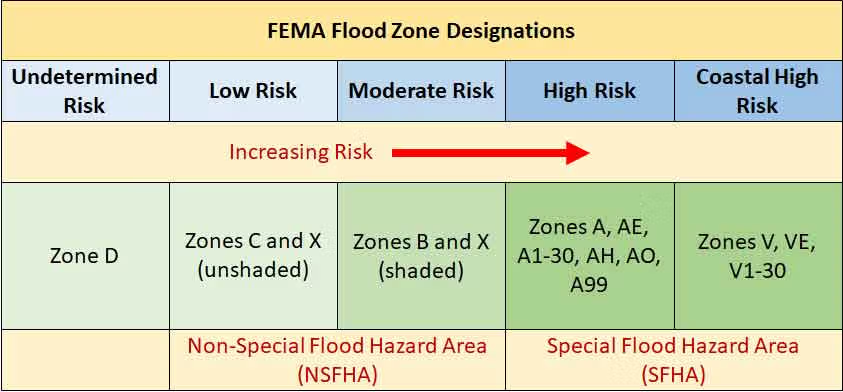

In [40]:
img = Image.open('flood_zones.avif')
display(img)

In [41]:
mask = df_subset['flood_zone'].str.contains('^A')
df_subset['high_flood_zone'] = False
df_subset.loc[mask, 'high_flood_zone'] = True
mask = df_subset['flood_zone'].str.contains('^V')
df_subset['coastal_high_flood_zone'] = False
df_subset.loc[mask, 'coastal_high_flood_zone'] = True
mask = df_subset['flood_zone'].str.contains('^[BCX]')
df_subset['low_moderate_flood_zone'] = False
df_subset.loc[mask, 'low_moderate_flood_zone'] = True
mask = df_subset['flood_zone'].str.contains('^D')
df_subset['undetermined_flood_zone'] = False
df_subset.loc[mask, 'undetermined_flood_zone'] = True
df_subset.head()

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,obstruction_type,reported_zipcode,census_tract,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone
0,X,43.3,-71.8,NH,WARNER,Unknown,Unknown,03278,3.301304e+10,Unknown,Unknown,Unknown,NaT,2008-08-19,2009-08-19,2010-08-19,250000.0,100000.0,375.0,0.001071,False,False,True,False
1,AE,30.5,-91.0,LA,DENHAM SPRINGS,Unknown,Unknown,70726,2.206304e+10,Unknown,Unknown,Unknown,NaT,1997-10-04,2009-10-04,2010-10-04,16400.0,8800.0,280.0,0.011111,True,False,False,False
2,X,33.7,-79.0,SC,MYRTLE BEACH,Unknown,Unknown,29579,4.505106e+10,Unknown,Unknown,Unknown,NaT,2005-08-13,2009-08-13,2010-08-13,250000.0,100000.0,335.0,0.000957,False,False,True,False
3,AE,34.0,-86.0,AL,GADSDEN,Unknown,50,35901,1.055001e+09,Unknown,Unknown,Unknown,2016-04-01,2006-04-14,2009-04-14,2010-04-14,174900.0,21000.0,916.0,0.004676,True,False,False,False
4,A10,26.0,-80.1,FL,GOLDEN BEACH,Unknown,Unknown,33160,1.208600e+10,Unknown,Unknown,Unknown,NaT,1996-04-04,2009-04-04,2010-04-04,250000.0,100000.0,1288.0,0.003680,True,False,False,False


In [42]:
state_count = df_subset['property_state'].value_counts()
state_count

property_state
FL    14888245
TX     7117910
LA     5508055
CA     2762517
NJ     2047684
        ...   
DC       16661
VI        7925
GU        2402
CM          98
AS          64
Name: count, Length: 56, dtype: int64

In [56]:
df_merged = pd.merge(df_subset, census_subset, how = "left", on = "census_tract")

In [ ]:
df_michigan = df_merged[df_merged['property_state'] == 'MI']
df_michigan.head()

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,obstruction_type,reported_zipcode,census_tract,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone
420,C,43.1,-86.2,MI,SPRING LAKE,Unknown,Unknown,49456,2.613902e+10,Unknown,Unknown,Unknown,NaT,2007-09-06,2009-09-06,2010-09-06,125000.0,50000.0,294.0,0.001680,False,False,True,False
636,X,42.3,-83.3,MI,DEARBORN HGTS,Unknown,Unknown,48125,2.616357e+10,Unknown,Unknown,Unknown,NaT,1999-08-18,2009-01-12,2010-01-12,172700.0,0.0,585.0,0.003387,False,False,True,False
764,C,42.1,-86.4,MI,SAINT JOSEPH,Unknown,10,49085,2.602100e+10,Unknown,Unknown,Unknown,2010-06-16,1997-06-16,2009-06-16,2010-06-16,150000.0,60000.0,283.0,0.001348,False,False,True,False
1161,AE,42.8,-86.2,MI,MACATAWA,Unknown,Unknown,49434,2.613902e+10,Unknown,Unknown,Unknown,NaT,2007-07-20,2009-07-20,2010-07-20,500000.0,0.0,2500.0,0.005000,True,False,False,False
1349,AE,42.3,-83.8,MI,ANN ARBOR,Unknown,Unknown,48103,2.616140e+10,Unknown,Unknown,Unknown,NaT,2008-04-08,2009-04-08,2010-04-08,70000.0,0.0,638.0,0.009114,True,False,False,False


In [ ]:
df_flordia = df_merged[df_merged['property_state'] == 'FL']
df_flordia.head()

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,obstruction_type,reported_zipcode,census_tract,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone
4,A10,26.0,-80.1,FL,GOLDEN BEACH,Unknown,Unknown,33160,1.208600e+10,Unknown,Unknown,Unknown,NaT,1996-04-04,2009-04-04,2010-04-04,250000.0,100000.0,1288.0,0.003680,True,False,False,False
9,X,28.0,-82.6,FL,TAMPA,Unknown,Unknown,33607,1.205701e+10,Unknown,Unknown,Unknown,NaT,2007-09-13,2009-09-13,2010-09-13,43300.0,10700.0,419.0,0.007759,False,False,True,False
11,AE,27.8,-80.5,FL,SEBASTIAN,Unknown,Unknown,32958,1.206105e+10,Unknown,Unknown,Unknown,NaT,2009-12-01,2009-12-01,2010-12-01,269000.0,0.0,663.0,0.002465,True,False,False,False
17,C,27.4,-82.5,FL,UNIVERSITY PK,Unknown,Unknown,34201,1.208100e+10,Unknown,Unknown,Unknown,NaT,2003-05-20,2009-05-20,2010-05-20,150000.0,60000.0,283.0,0.001348,False,False,True,False
19,X,30.5,-84.2,FL,TALLAHASSEE,Unknown,Unknown,32308,1.207300e+10,Unknown,Unknown,Unknown,NaT,2007-07-06,2009-07-06,2010-07-06,250000.0,100000.0,335.0,0.000957,False,False,True,False


Text(0.5, 1.0, 'Count of Properties in Each Flood Zone US')

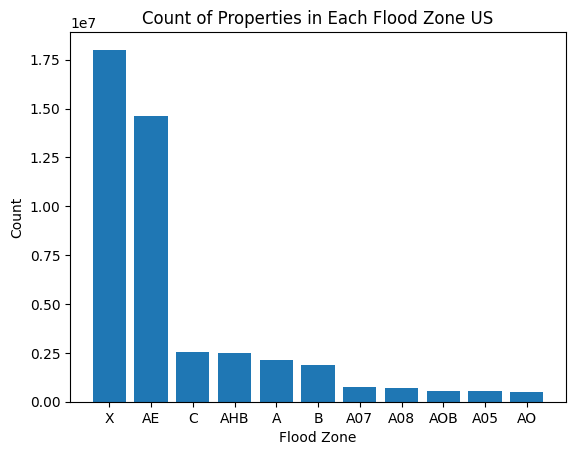

In [ ]:
floodzone_counts = df_merged['flood_zone'].value_counts()

labels = floodzone_counts[:11].index
heights = floodzone_counts[:11].values

plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone US")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone Level US')

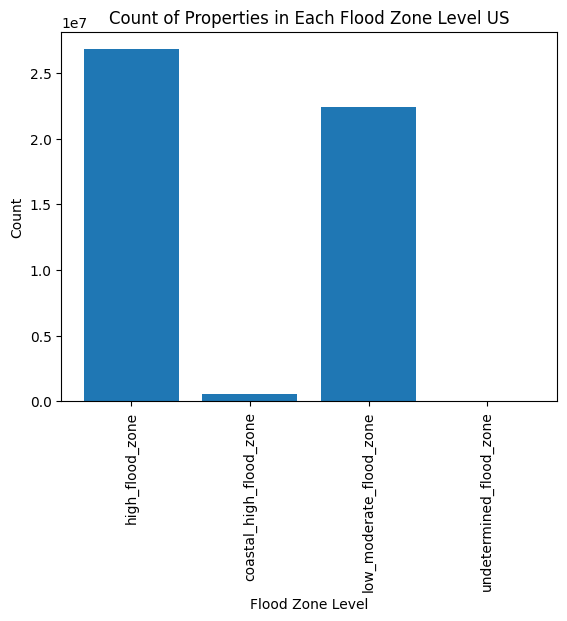

In [ ]:
floodzone_counts = df_merged[["high_flood_zone","coastal_high_flood_zone","low_moderate_flood_zone","undetermined_flood_zone"]].sum()
labels = floodzone_counts.index
heights = floodzone_counts.values
plt.bar(labels, heights)
plt.xticks(rotation = 90)
plt.xlabel("Flood Zone Level")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone Level US")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone MI')

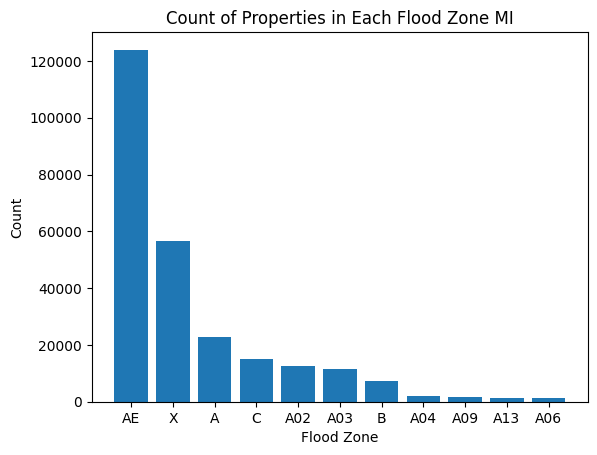

In [47]:
floodzone_counts = df_michigan['flood_zone'].value_counts()

labels = floodzone_counts[:11].index
heights = floodzone_counts[:11].values

plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone MI")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone Level MI')

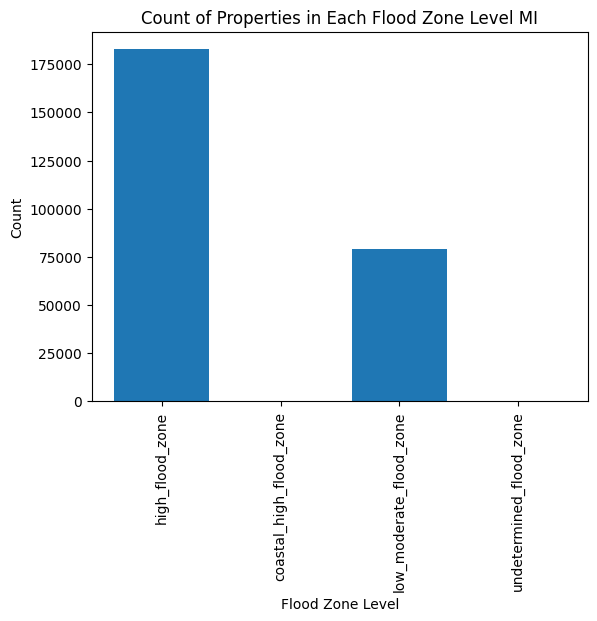

In [48]:
floodzone_counts = df_michigan[["high_flood_zone","coastal_high_flood_zone","low_moderate_flood_zone","undetermined_flood_zone"]].sum()
labels = floodzone_counts.index
heights = floodzone_counts.values
plt.bar(labels, heights)
plt.xticks(rotation = 90)
plt.xlabel("Flood Zone Level")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone Level MI")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone FL')

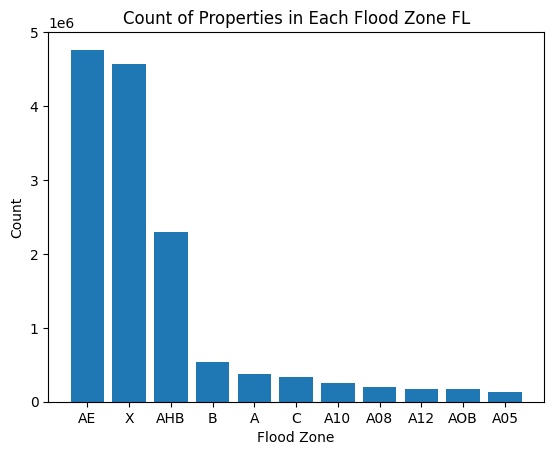

In [49]:
floodzone_counts = df_flordia['flood_zone'].value_counts()

labels = floodzone_counts[:11].index
heights = floodzone_counts[:11].values

plt.bar(labels, heights)
plt.xlabel("Flood Zone")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone FL")

Text(0.5, 1.0, 'Count of Properties in Each Flood Zone Level FL')

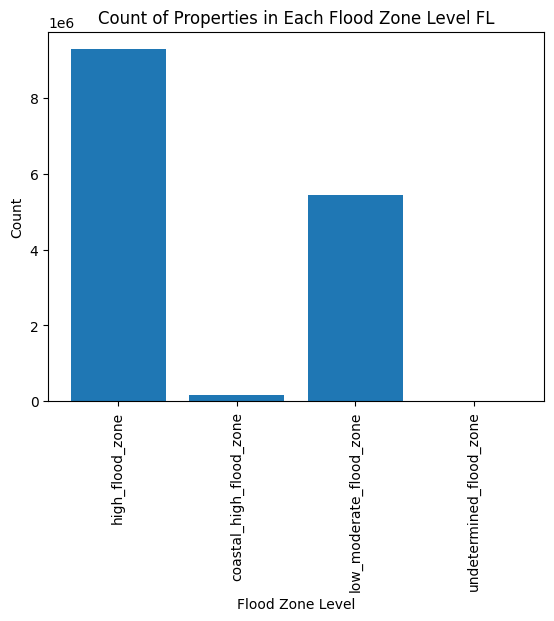

In [50]:
floodzone_counts = df_flordia[["high_flood_zone","coastal_high_flood_zone","low_moderate_flood_zone","undetermined_flood_zone"]].sum()
labels = floodzone_counts.index
heights = floodzone_counts.values
plt.bar(labels, heights)
plt.xticks(rotation = 90)
plt.xlabel("Flood Zone Level")
plt.ylabel("Count")
plt.title("Count of Properties in Each Flood Zone Level FL")

In [51]:
fl_sample = df_flordia.sample(n= 5000, random_state=42)
mi_sample = df_michigan.sample(n = 5000, random_state=42)
df_sample = pd.concat([fl_sample, mi_sample])
df_sample

,flood_zone,latitude,longitude,property_state,reported_city,small_business_indicator_building,obstruction_type,reported_zipcode,census_tract,non_profit_indicator,house_of_worship_indicator,agriculture_structure_indicator,cancellation_date_of_flood_policy,original_nb_date,policy_effective_date,policy_termination_date,total_building_insurance_coverage,total_contents_insurance_coverage,total_insurance_premium_of_the_policy,premium_rate,high_flood_zone,coastal_high_flood_zone,low_moderate_flood_zone,undetermined_flood_zone
1504743,AE,24.6,-81.7,FL,KEY WEST,Unknown,10,33040,1.208797e+10,Unknown,Unknown,Unknown,NaT,2003-04-24,2009-04-24,2010-04-24,38000.0,0.0,1174.0,0.030895,True,False,False,False
11266365,AHB,25.7,-80.4,FL,MIAMI,Unknown,Unknown,33175,1.208602e+10,Unknown,Unknown,Unknown,NaT,1998-08-06,2011-12-31,2012-10-24,250000.0,66200.0,349.0,0.001104,True,False,False,False
18288533,AE,27.3,-80.2,FL,JENSEN BEACH,Unknown,Unknown,34957,1.211138e+10,Unknown,Unknown,Unknown,NaT,2009-12-24,2012-12-24,2013-12-24,126800.0,42200.0,665.0,0.003935,True,False,False,False
29410845,A02,28.0,-81.8,FL,WINTER HAVEN,Unknown,Unknown,33880,1.210501e+10,Unknown,Unknown,Unknown,NaT,2011-09-21,2014-09-21,2015-09-21,167000.0,0.0,186.0,0.001114,True,False,False,False
22912718,X,25.7,-80.3,FL,WEST MIAMI,Unknown,Unknown,33155,1.208601e+10,Unknown,Unknown,Unknown,2014-03-27,2010-08-31,2013-08-31,2014-03-27,183500.0,0.0,1440.0,0.007847,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7475924,AE,43.4,-84.0,MI,SAGINAW,Unknown,60,48609,2.614501e+10,Unknown,Unknown,Unknown,NaT,2009-04-11,2010-04-11,2011-04-11,105000.0,0.0,1020.0,0.009714,True,False,False,False
25224382,A,43.9,-83.0,MI,BAD AXE,Unknown,Unknown,48413,2.606395e+10,Unknown,Unknown,Unknown,NaT,2014-09-29,2014-09-29,2015-09-29,60000.0,0.0,516.0,0.008600,True,False,False,False
18670185,AE,41.9,-83.4,MI,MONROE,Unknown,15,48162,2.611583e+10,Unknown,Unknown,Unknown,NaT,2005-06-21,2012-06-21,2013-06-21,166400.0,0.0,1228.0,0.007380,True,False,False,False
4596564,A,42.8,-85.1,MI,LAKE ODESSA,Unknown,Unknown,48849,2.606703e+10,Unknown,Unknown,Unknown,NaT,2007-05-11,2009-05-11,2010-05-11,50000.0,5000.0,503.0,0.009145,True,False,False,False


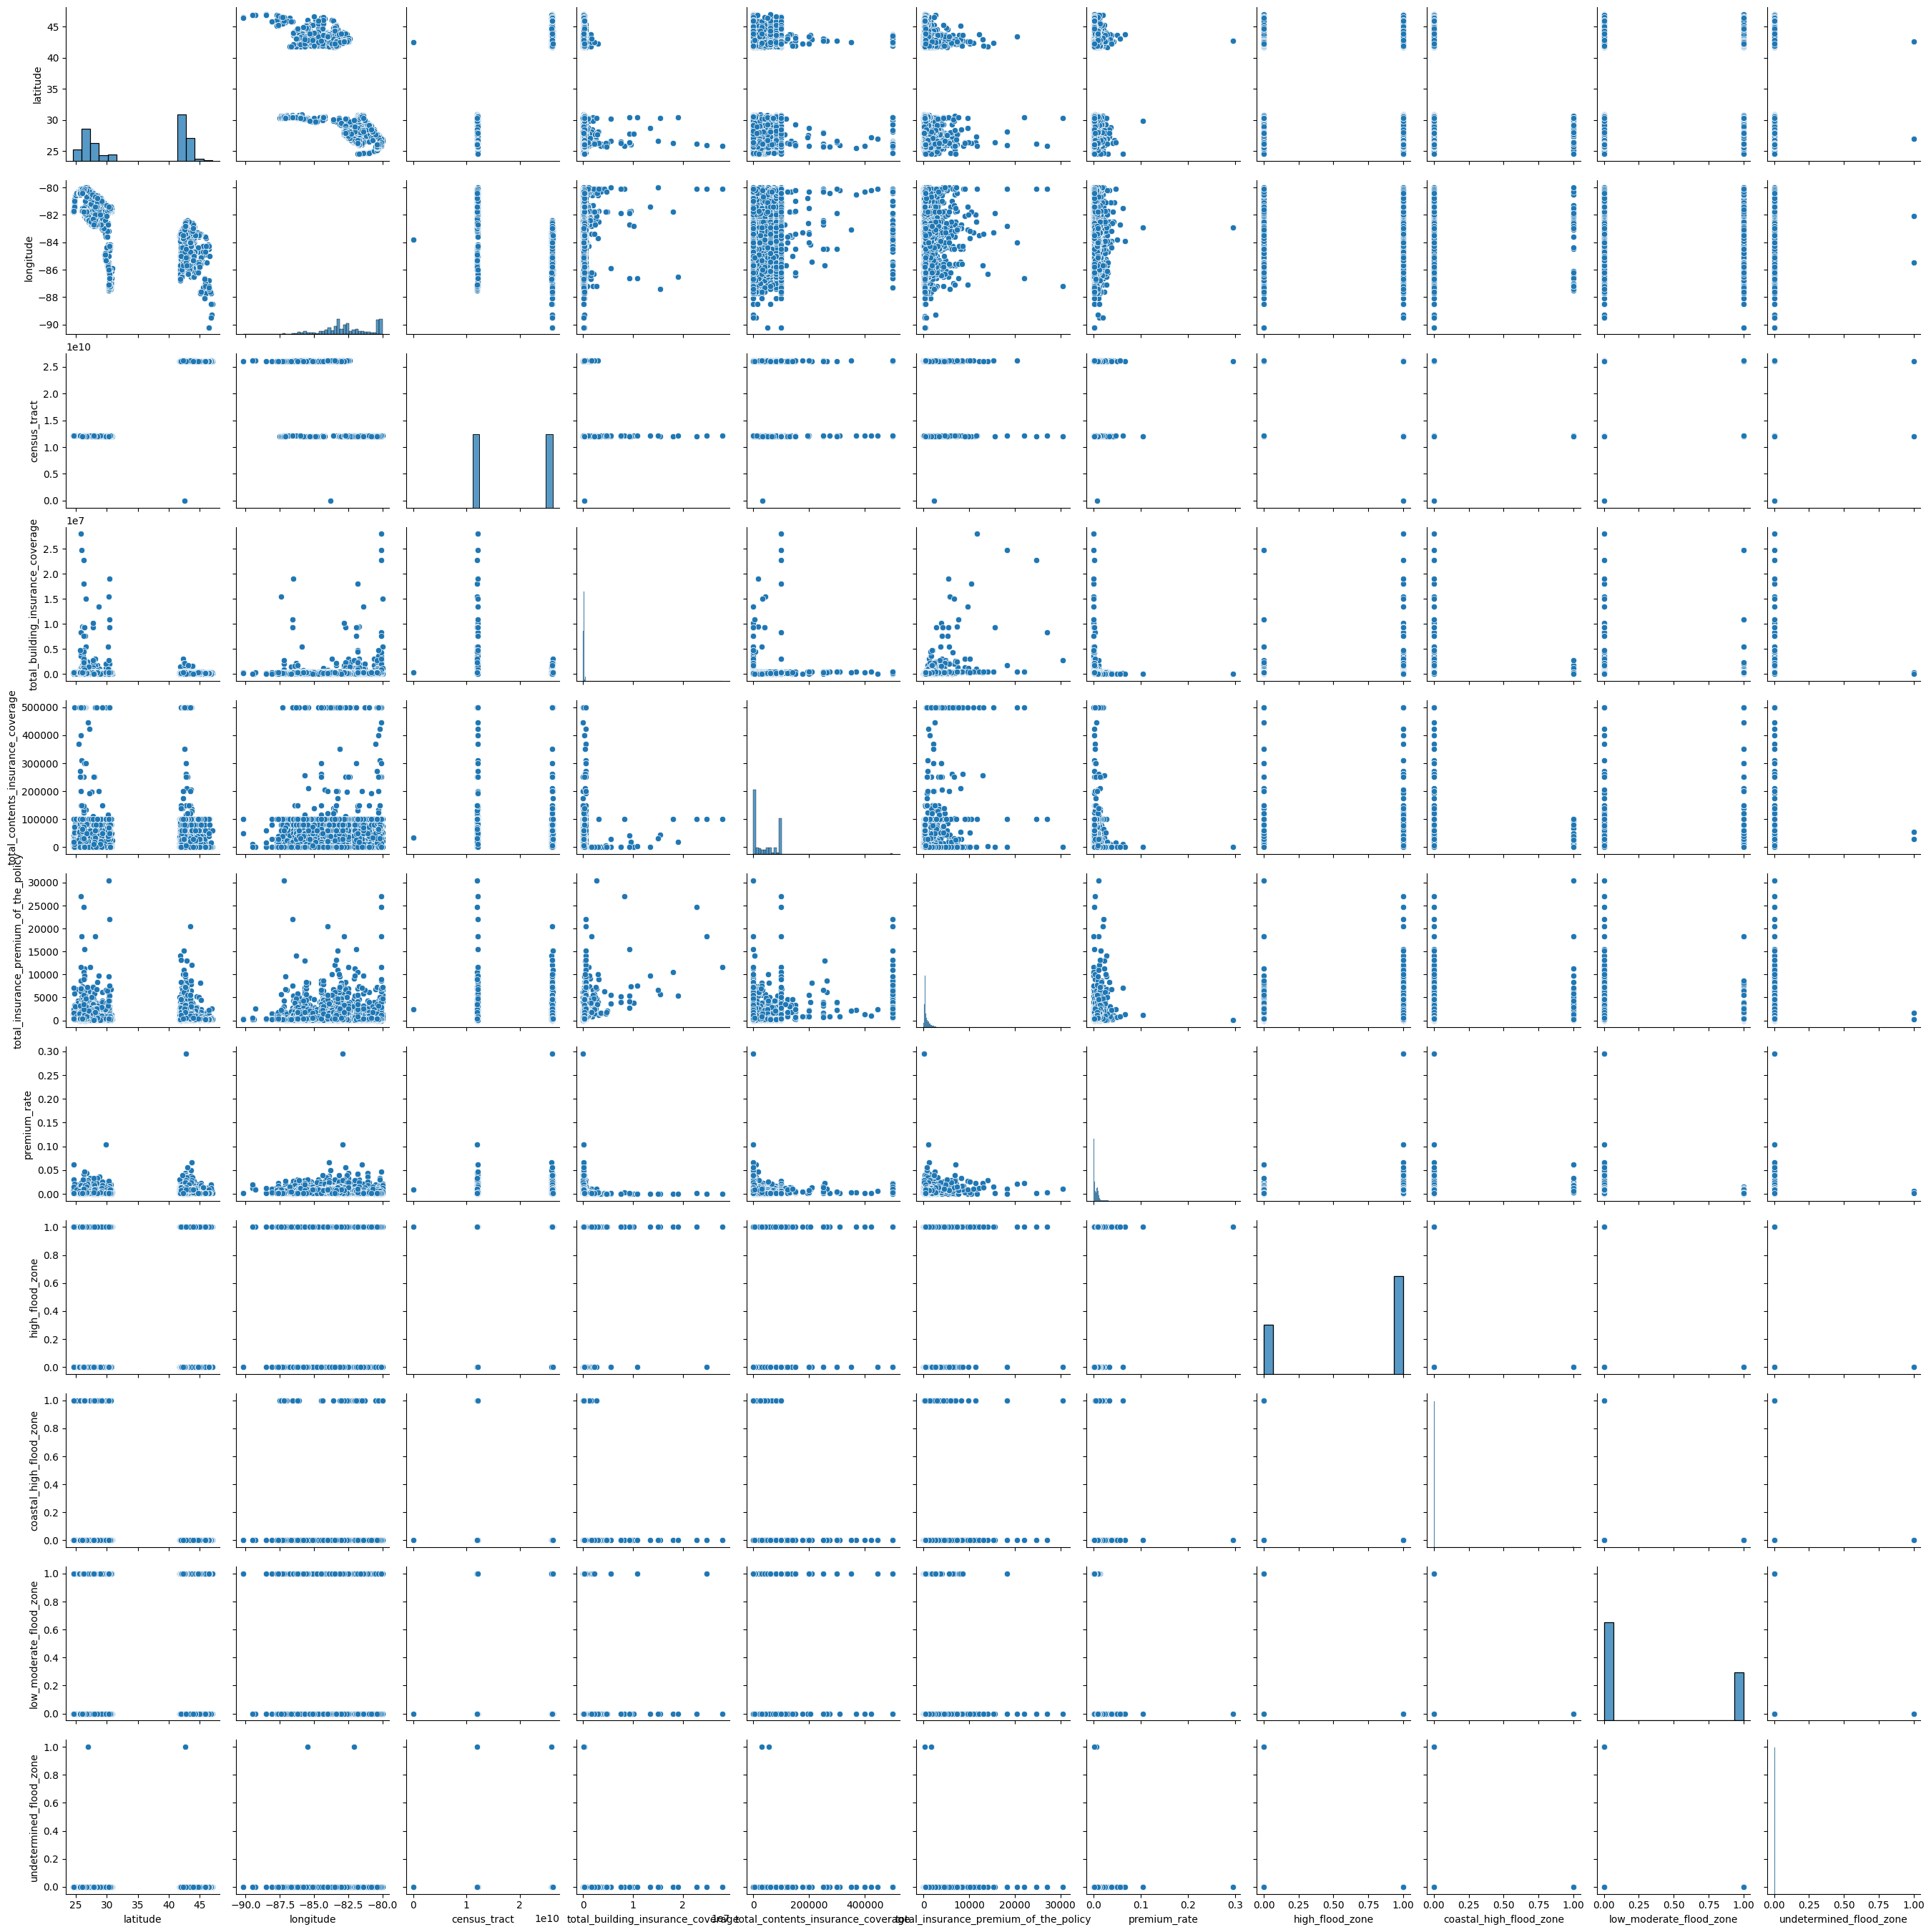

In [52]:
sns.pairplot(df_sample)